### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv("data/coupons.csv")

In [3]:
print(data.head())
print(data.columns)

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna().any()
# Gives us (rest of cols are false)
# car                      True
# Bar                      True
# CoffeeHouse              True
# CarryAway                True
# RestaurantLessThan20     True
# Restaurant20To50         True
cols_with_null_vals = [
    "car",
    "Bar",
    "CoffeeHouse",
    "CarryAway",
    "RestaurantLessThan20",
    "Restaurant20To50",
]
print(data[cols_with_null_vals].info())

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# manually attempted on all cols_with_null_vals
print(data[data["Restaurant20To50"].notnull()]["Restaurant20To50"])
px.histogram(data["Restaurant20To50"])

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")


# First: looking at Car, it doesn't give us much plus it's only ~100 non nulls, we can totally drop car column altogether

# Next: for Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, the vast majority of the rows have non-nulls(all have at least 12467).
# ^ Lets see if we can get rid of those rows that have NANs on total # of rows to play with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car                   108 non-null    object
 1   Bar                   12577 non-null  object
 2   CoffeeHouse           12467 non-null  object
 3   CarryAway             12533 non-null  object
 4   RestaurantLessThan20  12554 non-null  object
 5   Restaurant20To50      12495 non-null  object
dtypes: object(6)
memory usage: 594.7+ KB
None
0          1~3
1          1~3
2          1~3
3          1~3
4          1~3
5          1~3
6          1~3
7          1~3
8          1~3
9          1~3
10         1~3
11         1~3
12         1~3
13         1~3
14         1~3
15         1~3
16         1~3
17         1~3
18         1~3
19         1~3
20         1~3
21         1~3
22       less1
23       less1
24       less1
25       less1
26       less1
27       less1
28       less1
29       l

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
data = data.drop("car", axis=1)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

data
# now we have 12079 rows instead of 12683, which gets rid of ~4% of original data but at least now we have all our values filled out

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [6]:
print(data["Y"].mean())

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Bar plot of coupon acceptances'}, xlabel='Y'>

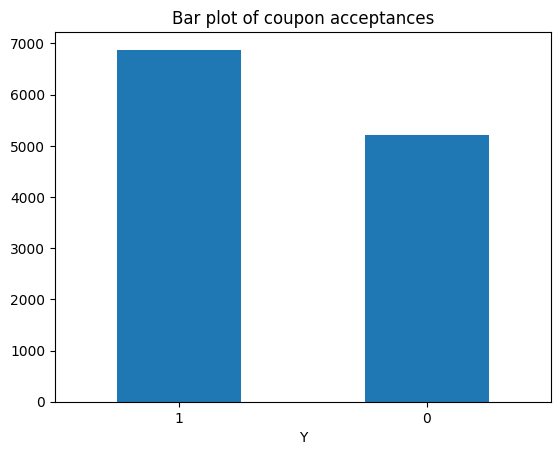

In [7]:
value_counts = data["Y"].value_counts()
value_counts.plot(kind="bar", rot=0, title="Bar plot of coupon acceptances")

6. Use a histogram to visualize the temperature column.

In [8]:
px.histogram(data, x="temperature", nbins=20, title="Histogram of temperature values")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
just_bar_coupons_df = data[data["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?


In [10]:
accepted_prop = just_bar_coupons_df["Y"].mean()
print(accepted_prop)

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# this displays the mean acceptance rate for all categories including 3 or fewer vs more
prop_by_bar_cat = just_bar_coupons_df.groupby("Bar")["Y"].mean()
print(prop_by_bar_cat)


three_or_fewer_prop = (
    prop_by_bar_cat.iloc[0] + prop_by_bar_cat.iloc[3] + prop_by_bar_cat.iloc[4]
) / 3  # adds 1~3 , less1, and never
more_than_three_prop = (prop_by_bar_cat.iloc[1] + prop_by_bar_cat.iloc[2]) / 2

print("\nthree or fewer prop", three_or_fewer_prop)
print("more than three prop", more_than_three_prop)

Bar
1~3      0.646438
4~8      0.775510
gt8      0.717391
less1    0.446655
never    0.189086
Name: Y, dtype: float64

three or fewer prop 0.4273929667835907
more than three prop 0.7464507542147294


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
print(
    just_bar_coupons_df["age"].value_counts()
)  # for assistance creating two vars below
age_values_below_25 = ["21", "below21"]
more_than_once_a_month_cats = ["1~3", "4~8", "gt8"]

# group a is for those who go to bar more than once a month and over age of 25
group_a = just_bar_coupons_df.query(
    "age not in @age_values_below_25 and Bar in @more_than_once_a_month_cats"
)

# group b is for everyone else
group_b = just_bar_coupons_df.query(
    "age in @age_values_below_25 or Bar not in @more_than_once_a_month_cats"
)


print(">25, more than once a month prop", group_a["Y"].mean())
print("everyone else prop", group_b["Y"].mean())

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64
>25, more than once a month prop 0.6898263027295285
everyone else prop 0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [13]:
kid_passenger = ["Kid(s)"]
g = just_bar_coupons_df.query(
    'Bar in @more_than_once_a_month_cats and passanger not in @kid_passenger and occupation != "Farming Fishing & Forestry"'
)

accepted_prop = g["Y"].mean()
print("Proportion for group described in 5: \t", accepted_prop)

Proportion for group described in 5: 	 0.7094339622641509


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [14]:
group_a = just_bar_coupons_df.query(
    'Bar in @more_than_once_a_month_cats and passanger not in @kid_passenger and occupation != "Widowed"'
)

under_thirty_ages = ["21", "26", "below21"]
group_b = just_bar_coupons_df.query(
    "Bar in @more_than_once_a_month_cats and age in @under_thirty_ages"
)

more_than_four_cheap = ["4~8", "gt8"]
income_less_50_k = [
    "$25000 - $37499",
    "$12500 - $24999",
    "$37500 - $49999",
    "Less than $12500",
]
group_c = just_bar_coupons_df.query(
    "RestaurantLessThan20 in @more_than_four_cheap and income in @income_less_50_k"
)


def mean_acceptance(group):
    return group["Y"].mean()


print(
    "In order of bullets above\n",
    mean_acceptance(group_a),
    "\n",
    mean_acceptance(group_b),
    "\n",
    mean_acceptance(group_c),
)

In order of bullets above
 0.7094339622641509 
 0.7195121951219512 
 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From the observations above, it is evident that the Bar coupons are more likely to be accepted by those who already go to the bars at least once a month, don't have kids in the car. Also, the younger the crowd (above legal limit), and especially those young adults who visit bars heavily already, are more likely to accept the Bar coupon. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#  Analysis for Cheap Restaurants (Restaurant(<20))

In [15]:
cheap_restaurants_df = data[data["coupon"] == "Restaurant(<20)"]

average_overall_acceptance = mean_acceptance(cheap_restaurants_df)
average_overall_acceptance  # used for baseline

0.7090086694308331

# Age
Below, I plot the approximate age histogram, colored by whehter coupon was accepted or not. We can see that age of coupon recipients generally has more younger-aged respondents than older. This is shown by the histogram being skewed left. Note: since there is only one category for 50plus, I will assume that the tail/trend actually continues in a more normally distributed way, gradually as age increases.

Additionally, acceptance rate has somewhat of a bi-modal distribution based on age, initially peaking at ~26 years old, and then again another peaking later at ~46 years old. This is shown below where I print the actual mean acceptance values by age group.

Recommendation: Target younger crowd, and favor targeting <50 folks rather than > 50

age
below21    0.737288
21         0.738095
26         0.741874
31         0.708134
36         0.647687
41         0.716049
46         0.750000
50plus     0.639474
Name: Y, dtype: float64


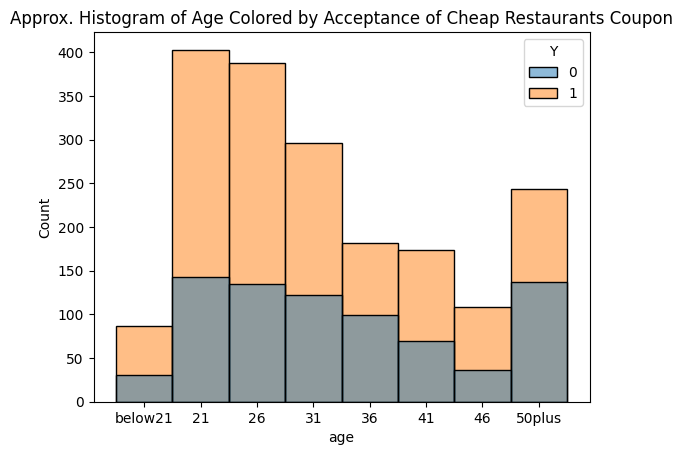

In [19]:
# Data re-ordering to sort by age for age analysis below
from pandas.api.types import CategoricalDtype

custom_sort_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
custom_dtype = CategoricalDtype(categories=custom_sort_order, ordered=True)
cheap_restaurants_df["age"] = cheap_restaurants_df.loc[:, "age"].astype(custom_dtype)
cheap_restaurants_df = cheap_restaurants_df.sort_values(by="age")

sns.histplot(data=cheap_restaurants_df, x="age", hue="Y")
plt.title("Approx. Histogram of Age Colored by Acceptance of Cheap Restaurants Coupon")

print(cheap_restaurants_df.groupby("age")["Y"].mean())

# Time of Day & Gender
Firstly, we can see that time of day seems to reveal a major pattern in acceptance of "cheap restaurants" coupons. In the histogram below, we see that acceptance rates peak at 10 AM through 6PM, and experience the lowest rates early in the morning and late in the day. 


Next, I print out the mean acceptance rate by time of day AND gender, and though we see the same general pattern as just described, we can also see that Men are more likely to accept than women at peak hours. 

Overall, the recommendation would be to favor towards doling out coupons at peak times (10AM to 6PM). 


time
7AM     0.587591
10AM    0.717770
2PM     0.813636
6PM     0.826573
10PM    0.507901
Name: Y, dtype: float64
time  gender
7AM   Female    0.596774
      Male      0.580000
10AM  Female    0.687943
      Male      0.746575
2PM   Female    0.799427
      Male      0.829582
6PM   Female    0.818421
      Male      0.835821
10PM  Female    0.463203
      Male      0.556604
Name: Y, dtype: float64


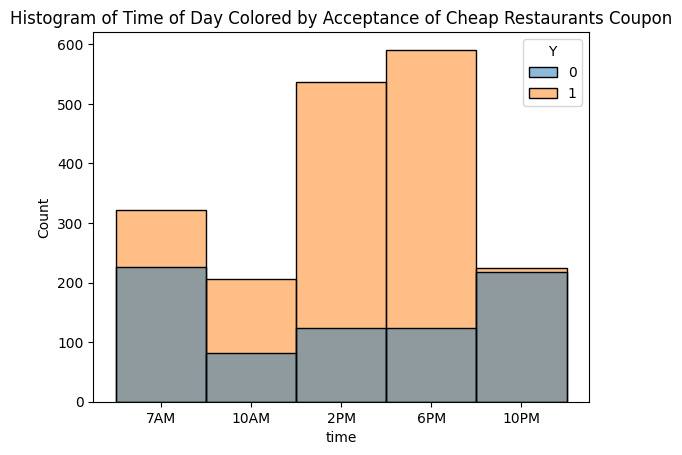

In [17]:
cheap_restaurants_df["time"].value_counts()
custom_sort_order = ["7AM", "10AM", "2PM", "6PM", "10PM"]
custom_dtype = CategoricalDtype(categories=custom_sort_order, ordered=True)
cheap_restaurants_df["time"] = cheap_restaurants_df["time"].astype(custom_dtype)
cheap_restaurants_df = cheap_restaurants_df.sort_values(by="time")

sns.histplot(data=cheap_restaurants_df, x="time", hue="Y")
plt.title("Histogram of Time of Day Colored by Acceptance of Cheap Restaurants Coupon")

# get stats when we group by multiple columns (time of day) AND Gender for even more findings
print(cheap_restaurants_df.groupby(["time"])["Y"].mean())
print(cheap_restaurants_df.groupby(["time", "gender"])["Y"].mean())

# By Education
We see that those with undergrad experience and peopel with Bachelor degrees have the highest acceptance rates for coupons for "cheap restaurants". However, the lowest acceptance rate comes from the group of people with a graduate education (usually correlated with higher income). The recommendation would be to tailor towards undegrad students versus graduate students, if presented the opportunity.


                                education         Y
2  Graduate degree (Masters or Doctorate)  0.615572
0                       Associates degree  0.659091
3                    High School Graduate  0.715054
4                        Some High School  0.722222
1                        Bachelors degree  0.731293
5                Some college - no degree  0.739316


Text(0.5, 1.0, 'Average Acceptance of Cheap Restaurant by Education Level')

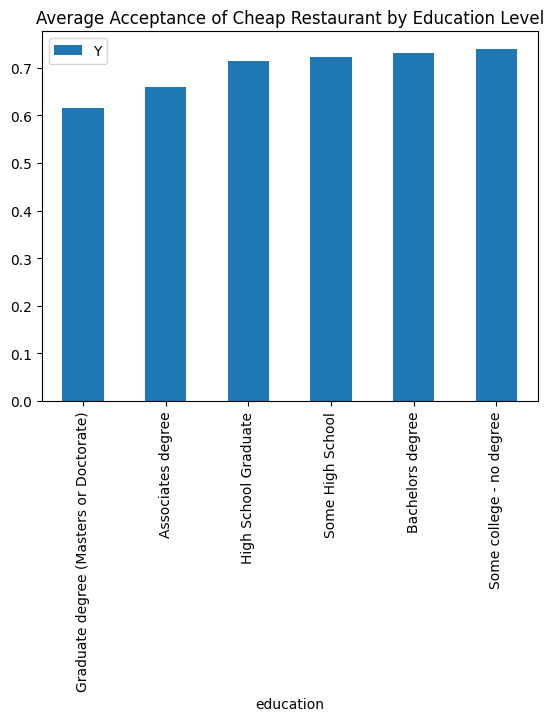

In [18]:
# bar plot by distance
df_by_occupation = (
    cheap_restaurants_df.groupby(["education"])[["Y"]]
    .mean()
    .reset_index()
    .sort_values("Y")
)
print(df_by_occupation)

df_by_occupation.plot(kind="bar", x="education")
plt.title("Average Acceptance of Cheap Restaurant by Education Level")